### Imports

In [5]:
# Try to decode which feature was selected per-trial based on firing rates of neurons
# experiment with ranges of firing rates around fixation (selection) time

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from lfp_tools import (
    general as lfp_general,
    startup as lfp_startup,
    development as lfp_development,
    analysis as lfp_analysis
)
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import s3fs
import utils.behavioral_utils as behavioral_utils
import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils
from trial_splitters.random_splitter import RandomSplitter
from trial_splitters.block_splitter import BlockSplitter
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import pickle


species = 'nhp'
subject = 'SA'
exp = 'WCST'
session = 20180802  # this is the session for which there are spikes at the moment. 
pre_interval = 1300
post_interval = 1500

feature_dims = ["Color", "Shape", "Pattern"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# grab behavioral data, spike data, trial numbers. 
fs = s3fs.S3FileSystem()
behavior_file = spike_general.get_behavior_path(subject, session)
behavior_data = pd.read_csv(fs.open(behavior_file))
valid_beh = behavior_data[behavior_data.Response.isin(["Correct", "Incorrect"])]   

feature_selections = pd.read_pickle(fs.open("l2l.pqz317.scratch/feature_selections.pickle"))
firing_rates = pd.read_pickle(fs.open(f"l2l.pqz317.scratch/firing_rates_{pre_interval}_fb_{post_interval}_50_bins.pickle"))

### Create Logistic Regression plots with 50ms Time bins

In [6]:
def create_fig_by_splitter(feature_dim, splitter, splitter_name, clf_type, clf, inputs, labels):
    _, test_accs_by_bin, shuffled_accs, models, splits = classifier_utils.evaluate_classifiers_by_time_bins(
        clf, inputs, labels, np.arange(0, 2.8, 0.05), splitter
    )
    np.save(fs.open(f"l2l.pqz317.scratch/{feature_dim}_{clf_type}_accs_{pre_interval}_fb_{post_interval}_by_50_bin_{splitter_name}_split.npy", "wb"), test_accs_by_bin)
    np.save(fs.open(f"l2l.pqz317.scratch/{feature_dim}_{clf_type}_shuffled_accs_{pre_interval}_fb_{post_interval}_by_50_bin_{splitter_name}_split.npy", "wb"), shuffled_accs)
    np.save(fs.open(f"l2l.pqz317.scratch/{feature_dim}_lr_models_{pre_interval}_fb_{post_interval}_by_50_bin_random_split.npy", "wb"), models)
    pickle.dump(splits, fs.open(f"l2l.pqz317.scratch/{feature_dim}_lr_splits_{pre_interval}_fb_{post_interval}_by_50_bin_random_split.npy", "wb"))
    
    # # generate figures
    fig, ax = plt.subplots()
    visualization_utils.visualize_accuracy_across_time_bins(
        test_accs_by_bin,
        pre_interval, post_interval, 50,
        ax,
        label="Test Acc",
        right_align=True
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        shuffled_accs,
        pre_interval, post_interval, 50,
        ax,
        label="Shuffled Acc",
        right_align=True
    )
    ax.axvline(-800, color='k')
    ax.set_xlabel("Time Bins (ms)")
    ax.set_ylabel("Decoder Accuracy")
    ax.set_title(f"Decoding {feature_dim} with 50ms Bins of Spiking")
    ax.legend()

Feature dim Color
Generating figs for Random Splitter
Evaluating for bin 0.0
Evaluating for bin 0.05
Evaluating for bin 0.1
Evaluating for bin 0.15000000000000002
Evaluating for bin 0.2
Evaluating for bin 0.25
Evaluating for bin 0.30000000000000004
Evaluating for bin 0.35000000000000003
Evaluating for bin 0.4
Evaluating for bin 0.45
Evaluating for bin 0.5
Evaluating for bin 0.55
Evaluating for bin 0.6000000000000001
Evaluating for bin 0.65
Evaluating for bin 0.7000000000000001
Evaluating for bin 0.75
Evaluating for bin 0.8
Evaluating for bin 0.8500000000000001
Evaluating for bin 0.9
Evaluating for bin 0.9500000000000001
Evaluating for bin 1.0
Evaluating for bin 1.05
Evaluating for bin 1.1
Evaluating for bin 1.1500000000000001
Evaluating for bin 1.2000000000000002
Evaluating for bin 1.25
Evaluating for bin 1.3
Evaluating for bin 1.35
Evaluating for bin 1.4000000000000001
Evaluating for bin 1.4500000000000002
Evaluating for bin 1.5
Evaluating for bin 1.55
Evaluating for bin 1.6
Evaluatin

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating for bin 2.0
Evaluating for bin 2.0500000000000003
Evaluating for bin 2.1
Evaluating for bin 2.15
Evaluating for bin 2.2
Evaluating for bin 2.25
Evaluating for bin 2.3000000000000003
Evaluating for bin 2.35
Evaluating for bin 2.4000000000000004
Evaluating for bin 2.45
Evaluating for bin 2.5
Evaluating for bin 2.5500000000000003
Evaluating for bin 2.6
Evaluating for bin 2.6500000000000004
Evaluating for bin 2.7
Evaluating for bin 2.75
Feature dim Shape
Generating figs for Random Splitter
Evaluating for bin 0.0
Evaluating for bin 0.05
Evaluating for bin 0.1
Evaluating for bin 0.15000000000000002
Evaluating for bin 0.2
Evaluating for bin 0.25
Evaluating for bin 0.30000000000000004
Evaluating for bin 0.35000000000000003
Evaluating for bin 0.4
Evaluating for bin 0.45
Evaluating for bin 0.5
Evaluating for bin 0.55
Evaluating for bin 0.6000000000000001
Evaluating for bin 0.65
Evaluating for bin 0.7000000000000001
Evaluating for bin 0.75
Evaluating for bin 0.8
Evaluating for bin 0.85

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating for bin 2.0
Evaluating for bin 2.0500000000000003
Evaluating for bin 2.1
Evaluating for bin 2.15
Evaluating for bin 2.2
Evaluating for bin 2.25
Evaluating for bin 2.3000000000000003
Evaluating for bin 2.35
Evaluating for bin 2.4000000000000004
Evaluating for bin 2.45
Evaluating for bin 2.5
Evaluating for bin 2.5500000000000003
Evaluating for bin 2.6
Evaluating for bin 2.6500000000000004
Evaluating for bin 2.7
Evaluating for bin 2.75
Feature dim Pattern
Generating figs for Random Splitter
Evaluating for bin 0.0
Evaluating for bin 0.05
Evaluating for bin 0.1
Evaluating for bin 0.15000000000000002
Evaluating for bin 0.2
Evaluating for bin 0.25
Evaluating for bin 0.30000000000000004
Evaluating for bin 0.35000000000000003
Evaluating for bin 0.4
Evaluating for bin 0.45
Evaluating for bin 0.5
Evaluating for bin 0.55
Evaluating for bin 0.6000000000000001
Evaluating for bin 0.65
Evaluating for bin 0.7000000000000001
Evaluating for bin 0.75
Evaluating for bin 0.8
Evaluating for bin 0.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluating for bin 2.0
Evaluating for bin 2.0500000000000003
Evaluating for bin 2.1
Evaluating for bin 2.15
Evaluating for bin 2.2
Evaluating for bin 2.25
Evaluating for bin 2.3000000000000003
Evaluating for bin 2.35
Evaluating for bin 2.4000000000000004
Evaluating for bin 2.45
Evaluating for bin 2.5
Evaluating for bin 2.5500000000000003
Evaluating for bin 2.6
Evaluating for bin 2.6500000000000004
Evaluating for bin 2.7
Evaluating for bin 2.75


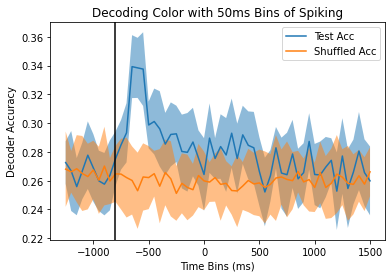

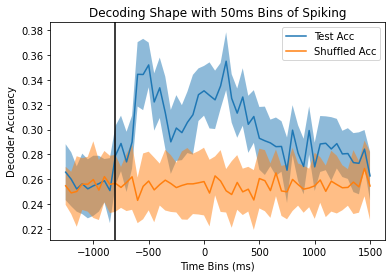

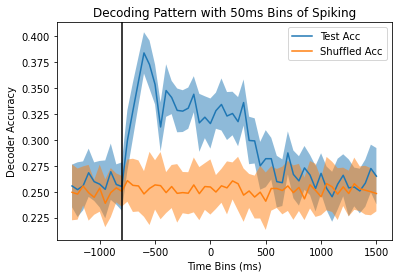

In [7]:
for feature_dim in feature_dims:
    print(f"Feature dim {feature_dim}")
    clf = LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial')
    # Look at Spike Counts instead of Firing Rate
    mode = "SpikeCounts"

    # prep data for classification
    inputs = firing_rates.rename(columns={mode: "Value"})
    labels = feature_selections.rename(columns={feature_dim: "Feature"})

    print(f"Generating figs for Random Splitter")
    random_splitter = RandomSplitter(labels.TrialNumber.unique(), 20, 0.2)
    create_fig_by_splitter(feature_dim, random_splitter, "random", "lr", clf, inputs, labels)